In [1]:
import os
import subprocess
import sys
import time
import matplotlib
matplotlib.use('Agg')
import librosa
import numpy as np
import pandas as pd
import pydub
import sklearn as sk
from numpy import *
from tqdm import *
import glob
%matplotlib inline
import matplotlib.pyplot as plt
from librosa import display

In [2]:
def load_audio(path):
    audio = pydub.AudioSegment.from_file(path).set_frame_rate(44100).set_channels(1)
    audio = audio
    while(len(audio)<10000):
        audio=audio+audio
    raw = (np.fromstring(audio._data, dtype="int16") + 0.5) / (0x7FFF + 0.5)   # convert to float
    return raw

In [3]:
def generate_spec2(path, hires=True , test=False):
    hires_ext = '.hires' if hires else ''
    
    audio = load_audio(path)
    spec = librosa.feature.melspectrogram(audio, sr=44100, n_fft=2205, hop_length=441, n_mels=180,
                                          fmax=16000)
    freqs = librosa.core.mel_frequencies(n_mels=180, fmax=16000)
    spec = librosa.core.perceptual_weighting(spec, freqs)#, ref_power=np.max)
    t=np.shape(spec)[1]
    i=1
    while i*1000<t:
        spec1 = spec[5:175,(i-1)*1000:i*1000]
        spec1 += 40
        spec1 /= 10.0
        print(path+ str(i))
        spec1=(spec1-(spec1.mean()))/spec1.std()
        np.save(path + str(i) +'.spec.npy',spec1.astype('float16'), allow_pickle=False)
        i=i+1

In [ ]:
import glob
files = glob.glob("D:/iitd/SEM6/COP315/xeno_full_spec/treepie"+"**", recursive=False)
for file in files:
    mp3s = glob.glob(file+"/**.mp3", recursive=False)
    for mp3 in mp3s:
        generate_spec2(mp3);
        

In [5]:
def plott(f):
    a=np.load(f)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(a[:,:500],
                              fmax=40000,
                             y_axis='mel',
                              x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    print(a.max(),a.min,a.mean)
    plt.savefig(f+".png")

In [ ]:
import glob
files = glob.glob("D:/iitd/SEM6/COP315/xeno_full_spec/"+"**", recursive=False)
for file in files:
    mp3s = glob.glob(file+"/**.npy", recursive=False)
    for mp3 in mp3s:
        print(mp3)
        plott(mp3)

In [ ]:
a=np.load("D:/iitd/SEM6/COP315/delhi_bird/green_pigeon/YELLOW FOOTED GREEN PIGEON Call Sound in Day and Night5.wav.spec.npy")
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(a[:,:500],
                          fmax=40000,
                         y_axis='mel',
                          x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
print(np.min(a))

-1.577


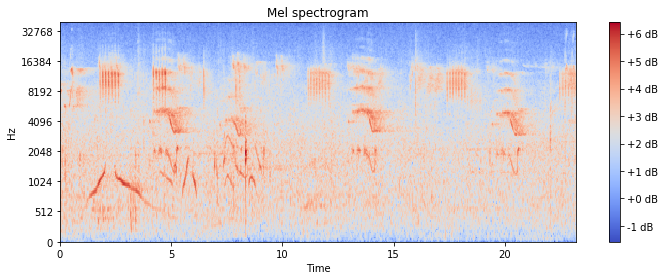

In [65]:

    a=np.load("D:/iitd/SEM6/COP315/delhi_bird/green_pigeon/YELLOW FOOTED GREEN PIGEON Call Sound in Day and Night5.wav.spec.npy")
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(a,
                              fmax=40000,
                             y_axis='mel',
                              x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.tight_layout()
    print(np.min(a))

In [23]:
plt.subplot(131)
plt.title('Input')
plt.imshow(a)
plt.show()

In [71]:
np.mean(a,axis=1)

array([ 0.6025 ,  1.235  ,  1.661  ,  1.874  ,  2.006  ,  2.078  ,
        2.133  ,  2.219  ,  2.354  ,  2.43   ,  2.477  ,  2.557  ,
        2.633  ,  2.705  ,  2.785  ,  2.818  ,  2.809  ,  2.795  ,
        2.812  ,  2.906  ,  3.006  ,  3.043  ,  3.014  ,  2.96   ,
        2.93   ,  2.93   ,  2.959  ,  3.008  ,  3.023  ,  3.033  ,
        2.998  ,  3.     ,  2.975  ,  2.957  ,  2.996  ,  3.018  ,
        3.055  ,  3.033  ,  3.027  ,  3.02   ,  3.04   ,  3.041  ,
        3.047  ,  3.004  ,  3.008  ,  3.064  ,  3.023  ,  2.99   ,
        2.996  ,  3.012  ,  3.03   ,  3.066  ,  2.934  ,  2.936  ,
        3.027  ,  3.062  ,  3.047  ,  3.104  ,  2.99   ,  3.145  ,
        3.166  ,  3.184  ,  3.04   ,  3.143  ,  3.145  ,  3.12   ,
        3.018  ,  2.896  ,  2.885  ,  2.867  ,  2.871  ,  2.803  ,
        2.742  ,  2.68   ,  2.672  ,  2.678  ,  2.756  ,  2.754  ,
        2.775  ,  2.826  ,  2.824  ,  2.783  ,  2.768  ,  2.74   ,
        2.744  ,  2.756  ,  2.768  ,  2.732  ,  2.695  ,  2.68

In [4]:

y=[]

In [7]:
files = glob.glob("D:/iitd/SEM6/COP315/delhi_bird/"+"**", recursive=False)
i=0
for file in files:
    print(file)
    mp3s = glob.glob(file+"/**.npy", recursive=False)
    i+=1
    for mp3 in mp3s:
        a=np.load(mp3);
        if(np.shape(a)==(170,1000)):
            x=a-mean(a)
            X.append(x)
            y.append(i)


D:/iitd/SEM6/COP315/delhi_bird\Alexandrine_parakeet
D:/iitd/SEM6/COP315/delhi_bird\brahmani_myna
D:/iitd/SEM6/COP315/delhi_bird\bulbul
D:/iitd/SEM6/COP315/delhi_bird\collored_dove
D:/iitd/SEM6/COP315/delhi_bird\common_crow
D:/iitd/SEM6/COP315/delhi_bird\common_myna
D:/iitd/SEM6/COP315/delhi_bird\common_sparrow
D:/iitd/SEM6/COP315/delhi_bird\green_pigeon
D:/iitd/SEM6/COP315/delhi_bird\indian_robin
D:/iitd/SEM6/COP315/delhi_bird\koel
D:/iitd/SEM6/COP315/delhi_bird\pigeon
D:/iitd/SEM6/COP315/delhi_bird\red_parakeet
D:/iitd/SEM6/COP315/delhi_bird\tailor_bird


In [8]:
np.shape(X)

(925, 170, 1000)

In [89]:
np.shape(y)

(925,)

In [90]:
y

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,


In [20]:
Xmax=np.mean(X,axis=2)
np.shape(Xmax)

(925, 170)

In [10]:
import sklearn
from sklearn import manifold
print(__doc__)
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)
{'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
, 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink

Automatically created module for IPython interactive environment


D:\C\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


("'tab:green',", "'tab:red',", "'tab:purple',", "'tab:brown',", "'tab:pink")

In [11]:
def plot_embedding(X,y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    
    for i in range(X.shape[0]):
        if(y[i]==2):
            c='r'
        elif(y[i]==3):
            c='g'
        elif(y[i]==4):
            c='b'
        elif(y[i]==5):
            c='y'
        elif(y[i]==6):
            c='c'
        elif(y[i]==7):
            c='tab:pink'
        elif(y[i]==8):
            c='tab:brown'
        elif(y[i]==9):
            c='m'
        elif(y[i]==10):
            c='tab:blue'
        elif(y[i]==11):
            c='tab:orange'
        elif(y[i]==12):
            c='tab:green'
        else:
            c='tab:red'
        
        plt.scatter(X[i, 0], X[i, 1],color=c)

In [22]:
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(Xmax,y)

Computing t-SNE embedding


<Figure size 1080x720 with 0 Axes>

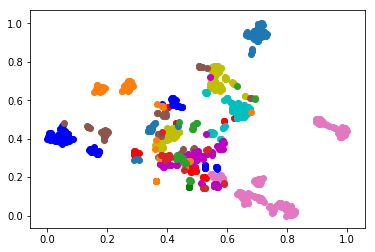

In [19]:
plt.figure(figsize=(15,10))
plot_embedding(X_tsne[:],y,
               "t-SNE embedding of the digits")
plt.show()

<Figure size 1080x720 with 0 Axes>

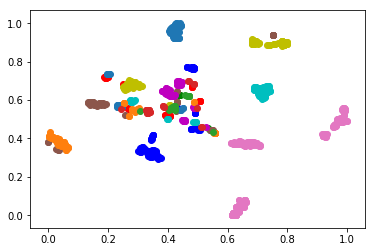

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()


ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "D:\C\anaconda\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "D:\C\anaconda\lib\asyncio\selector_events.py", line 141, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection 

In [23]:
plt.figure(figsize=(15,10))
plot_embedding(X_tsne[:],y,
               "t-SNE embedding of the digits")
plt.show()